# Trabajo Integrador Parte 4

Nombre: Simon Rodriguez

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [399]:
DATASET_PATH = "./data/heart_disease/"

In [400]:
my_cols = pd.read_csv(DATASET_PATH + 'columns.csv').column.values.tolist()

my_data = pd.read_csv(DATASET_PATH + 'processed.cleveland.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [401]:
my_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [402]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "thalach"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
target = "num"

Una vez separadas las variables por tipo, podemos empezar el analisis. Lo primero es binarizar a la variable target

In [403]:
my_data[target].value_counts()

num
0    163
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [404]:
y = my_data[target].values

In [405]:
sano_mask = y == 0
enfermo_mask = y > 0

In [406]:
y_class = y.copy()

y_class[sano_mask] = 0
y_class[enfermo_mask] = 1

In [407]:
y_class

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [408]:
pd.get_dummies(my_data[categorical_features])

,sex,cp,fbs,restecg,exang,slope,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
0,1.0,4.0,0.0,2.0,1.0,2.0,False,False,False,True,False,True,False,False,False
1,1.0,4.0,0.0,2.0,1.0,2.0,False,False,True,False,False,False,False,True,False
2,1.0,3.0,0.0,0.0,0.0,3.0,True,False,False,False,False,True,False,False,False
3,0.0,2.0,0.0,2.0,0.0,1.0,True,False,False,False,False,True,False,False,False
4,1.0,2.0,0.0,0.0,0.0,1.0,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1.0,1.0,0.0,0.0,0.0,2.0,True,False,False,False,False,False,False,True,False
298,1.0,4.0,1.0,0.0,0.0,2.0,False,False,True,False,False,False,False,True,False
299,1.0,4.0,0.0,0.0,1.0,2.0,False,True,False,False,False,False,False,True,False
300,0.0,2.0,0.0,2.0,0.0,2.0,False,True,False,False,False,True,False,False,False


In [409]:
# PCA solo a las features numéricas
just_num = my_data[numerical_features]

scaler = StandardScaler()
just_num = scaler.fit_transform(just_num)

pca_num = PCA(n_components=0.9).fit(just_num)

pca_num.n_components_

4

In [410]:
pca_num.explained_variance_ratio_

array([0.41457988, 0.21206574, 0.1513871 , 0.12903375])

In [411]:
X_transformed_num = pca_num.transform(just_num)

<Axes: >

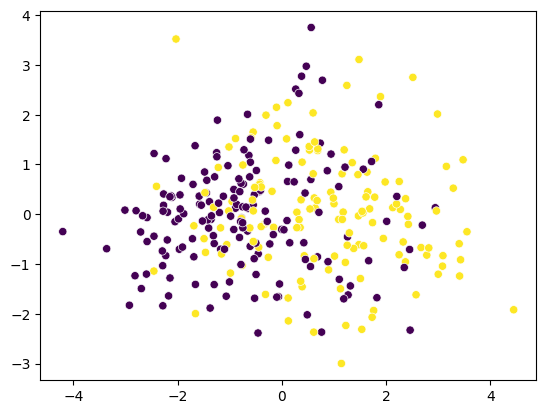

In [412]:
sns.scatterplot(x=X_transformed_num[:,0], y=X_transformed_num[:,1], c = y_class)

In [413]:
# Convertimos valores categóricos en numéricos.
dummies = pd.get_dummies(my_data[categorical_features])
dummies = dummies.astype(float)

In [414]:
# Combinamos tanto las features numéricas como las categóricas convertidas
numerical_column = my_data[numerical_features]
all_data = pd.concat([numerical_column, dummies], axis=1)

In [415]:
# PCA solo para las features categóricas convertidas en numéricas

scaler = StandardScaler()
dummies = scaler.fit_transform(dummies)

pca_cat = PCA(n_components=0.9).fit(dummies)

pca_cat.n_components_

8

In [416]:
X_transformed_cat = pca_cat.transform(dummies)

<Axes: >

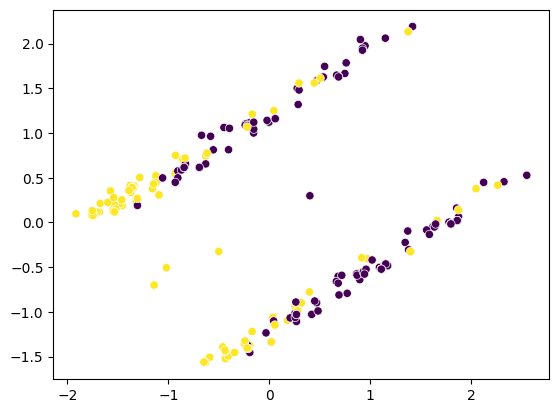

In [417]:
sns.scatterplot(x=X_transformed_cat[:,0], y=X_transformed_cat[:,1], c = y_class)

In [418]:
all_data

,age,trestbps,chol,thalach,oldpeak,thalach,sex,cp,fbs,restecg,...,slope,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
0,67.0,160.0,286.0,108.0,1.5,108.0,1.0,4.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,67.0,120.0,229.0,129.0,2.6,129.0,1.0,4.0,0.0,2.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37.0,130.0,250.0,187.0,3.5,187.0,1.0,3.0,0.0,0.0,...,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,41.0,130.0,204.0,172.0,1.4,172.0,0.0,2.0,0.0,2.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,56.0,120.0,236.0,178.0,0.8,178.0,1.0,2.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,110.0,264.0,132.0,1.2,132.0,1.0,1.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
298,68.0,144.0,193.0,141.0,3.4,141.0,1.0,4.0,1.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
299,57.0,130.0,131.0,115.0,1.2,115.0,1.0,4.0,0.0,0.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
300,57.0,130.0,236.0,174.0,0.0,174.0,0.0,2.0,0.0,2.0,...,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [419]:
# PCA incluyendo todas las features

scaler = StandardScaler()
all_data = scaler.fit_transform(all_data)

pca_all = PCA(n_components=0.9).fit(all_data)

pca_all.n_components_

14

In [420]:
X_transformed_all = pca_all.transform(all_data)

<Axes: >

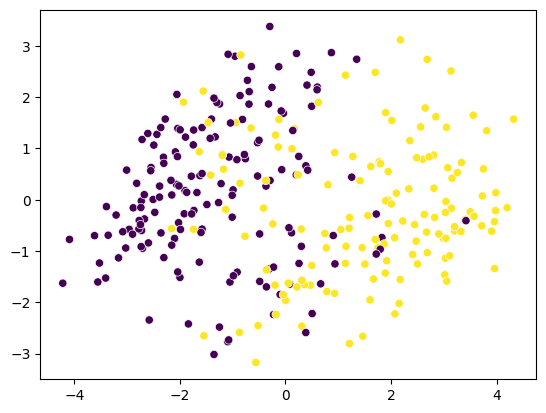

In [421]:
sns.scatterplot(x=X_transformed_all[:,0], y=X_transformed_all[:,1], c = y_class)

In [422]:
pca_df = pd.DataFrame(X_transformed_all, columns=[f'pca{i}' for i in range(pca_all.n_components_)])

In [423]:
pca_df.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13
0,3.136859,2.511988,-0.526026,0.406309,-0.178997,-2.300298,-0.260093,1.922452,-1.255369,0.192448,-0.106016,-0.061180,-0.593985,-1.601299
1,3.501940,-0.234289,0.721018,0.401362,-0.055640,2.233305,-0.371154,0.244951,-0.423256,0.077904,0.902606,0.579769,-1.467630,0.011153
2,-1.633256,-1.217304,-0.758122,1.969635,-0.105973,0.217128,-1.839935,-0.183548,0.386682,0.536882,1.945196,-0.395005,2.123652,0.185977
3,-2.819490,0.320504,-0.331375,0.675344,-0.084367,-0.122634,-0.492319,-0.373408,-0.074547,0.439266,0.929013,0.262598,-0.138961,-0.533813
4,-2.753149,-0.446993,0.117262,-0.004440,0.212435,-0.051690,-0.475787,0.112154,0.233260,-0.808868,0.060329,0.185852,-0.112963,0.160519


# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [424]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

models = [
    ['LogisticRegression', LogisticRegression()],
    ['LogisticRegressionCV', LogisticRegressionCV()],
]

# Dividir en conjuntos de entrenamiento y prueba
X = [
    ['Features Numéricas', X_transformed_num],
    ['Features Categoricas', X_transformed_cat],
    ['Todas las Features', X_transformed_all]
]
y = y_class

# Se entrena y se evalúa cada modelo
for scope, x in X:

    print('Utilizando: ', scope)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

    for model_name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Se calcula la precisión
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_name} - Accuracy: {accuracy:.2f}")

        # Se calcula y muestra la matriz de confusión
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(f"Confusion Matrix for {model_name}:\n{conf_matrix}")

        # Se genera el reporte de clasificación
        class_report = classification_report(y_test, y_pred)
        print(f"Classification Report for {model_name}:\n{class_report}")
        print("="*80)  # Para separar los reportes/resultados de cada modelo.

Utilizando:  Features Numéricas
LogisticRegression - Accuracy: 0.66
Confusion Matrix for LogisticRegression:
[[24  6]
 [15 16]]
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.62      0.80      0.70        30
           1       0.73      0.52      0.60        31

    accuracy                           0.66        61
   macro avg       0.67      0.66      0.65        61
weighted avg       0.67      0.66      0.65        61

LogisticRegressionCV - Accuracy: 0.67
Confusion Matrix for LogisticRegressionCV:
[[25  5]
 [15 16]]
Classification Report for LogisticRegressionCV:
              precision    recall  f1-score   support

           0       0.62      0.83      0.71        30
           1       0.76      0.52      0.62        31

    accuracy                           0.67        61
   macro avg       0.69      0.67      0.66        61
weighted avg       0.69      0.67      0.66        61

Utilizando:  Features Ca

**Conclusiones:** En base a los resultados, se puede concluir en este caso, que utilizar solamente las features categóricas (reducidas por medio de PCA) ofrece los mejores resultados en cuanto a precisión (0.87 y 0.90 utilizando LogisticRegression y LogisticRegressionCV, respectivamente).